In [1]:
import os
import gymnasium   #
import numpy as np
import matplotlib.pyplot as plt
import CoppeliaSim_Gym   # Entorno personalizado
import stable_baselines3   # Biblioteca RL
import torch as th   # para modelo CNN
import torch.nn as nn
from gymnasium import spaces
from stable_baselines3.common.vec_env import VecFrameStack, VecNormalize # Envoltorio para imagen
from stable_baselines3.sac.policies import MlpPolicy # Arquitectura de RN
from stable_baselines3 import A2C, TD3, DQN, DDPG, PPO, SAC, HER # algoritmo de entrenamiento
from stable_baselines3.common.evaluation import evaluate_policy   # Evaluar politica
from stable_baselines3.common.callbacks import EvalCallback, BaseCallback   # llamada para el mejor modelo

from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common import results_plotter

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):

    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Crear carpeta si se necesita
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Recuperar recompensa de entrenamiento
            x, y = ts2xy(load_results(self.log_dir), "timesteps")
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print(f"Num timesteps: {self.num_timesteps}")
                    print(
                        f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}"
                    )

                # Nuevo mejor modelo
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Ejemplo para guardar mejor modelo
                    if self.verbose > 0:
                        print(f"Saving new best model to {self.save_path}.zip")
                    self.model.save(self.save_path)

        return True

In [3]:
# Crear directorio de LOG
log_dir = './perf'
os.makedirs(log_dir, exist_ok=True)

In [4]:
# Instancia de entorno
ENV_NAME = "CoppeliaSim_Gym/GymCoppManR-v0"
env = gymnasium.make(ENV_NAME) 
env = Monitor(env, log_dir)

Conectado al servidor API remoto


In [5]:
# Red Neuronal FC estandar con Stable Baselines3
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=dict(pi=[256, 512, 256], vf=[256, 512, 256]))

In [6]:
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
model = A2C("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1, device="auto", tensorboard_log='./A2C_tensorboard/')
model.learn(total_timesteps = 1000, callback = callback) # con mejor modelo
model.save("modeloA2CReach") # Guardar modelo DRL

Using cuda device
Wrapping the env in a DummyVecEnv.
Logging to ./A2C_tensorboard/A2C_1
Contador:  1
Distancia previa : 0.602 m
Distancia actual: 0.603 m
Recompensa Distancia: -0.603
Recompensa Costo: -0.43378186225891113
Recompensa diferencia: -0.001
Recompensa llegada: 0.0
Recompensa Total:  -1.0383427469813395
--------------------------------------------------------------------
Contador:  2
Distancia previa : 0.603 m
Distancia actual: 0.593 m
Recompensa Distancia: -0.593
Recompensa Costo: -0.4461559772491455
Recompensa diferencia: 0.010
Recompensa llegada: 0.0
Recompensa Total:  -1.0295487782217565
--------------------------------------------------------------------
Contador:  3
Distancia previa : 0.593 m
Distancia actual: 0.583 m
Recompensa Distancia: -0.583
Recompensa Costo: -0.3114819049835205
Recompensa diferencia: 0.010
Recompensa llegada: 0.0
Recompensa Total:  -0.8850007936878338
--------------------------------------------------------------------
Contador:  4
Distancia previ

Distancia actual: 0.612 m
Recompensa Distancia: -0.612
Recompensa Costo: -0.5930130481719971
Recompensa diferencia: -0.012
Recompensa llegada: 0.0
Recompensa Total:  -1.21708073538796
--------------------------------------------------------------------
Contador:  30
Distancia previa : 0.612 m
Distancia actual: 0.614 m
Recompensa Distancia: -0.614
Recompensa Costo: -0.4710972309112549
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -1.0869030145164837
--------------------------------------------------------------------
Contador:  31
Distancia previa : 0.614 m
Distancia actual: 0.609 m
Recompensa Distancia: -0.609
Recompensa Costo: -0.3969459533691406
Recompensa diferencia: 0.005
Recompensa llegada: 0.0
Recompensa Total:  -1.0003400647415157
--------------------------------------------------------------------
Contador:  32
Distancia previa : 0.609 m
Distancia actual: 0.611 m
Recompensa Distancia: -0.611
Recompensa Costo: -0.5357759952545166
Recompensa diferencia:

Distancia actual: 0.622 m
Recompensa Distancia: -0.622
Recompensa Costo: -0.3248649597167969
Recompensa diferencia: -0.001
Recompensa llegada: 0.0
Recompensa Total:  -0.9481691804911401
--------------------------------------------------------------------
Contador:  58
Distancia previa : 0.622 m
Distancia actual: 0.632 m
Recompensa Distancia: -0.632
Recompensa Costo: -0.3839232683181763
Recompensa diferencia: -0.009
Recompensa llegada: 0.0
Recompensa Total:  -1.025266879117749
--------------------------------------------------------------------
Contador:  59
Distancia previa : 0.632 m
Distancia actual: 0.641 m
Recompensa Distancia: -0.641
Recompensa Costo: -0.404759693145752
Recompensa diferencia: -0.009
Recompensa llegada: 0.0
Recompensa Total:  -1.0554392021490688
--------------------------------------------------------------------
Contador:  60
Distancia previa : 0.641 m
Distancia actual: 0.654 m
Recompensa Distancia: -0.654
Recompensa Costo: -0.35713202953338624
Recompensa diferenci

Distancia actual: 0.930 m
Recompensa Distancia: -0.930
Recompensa Costo: -0.5284749507904053
Recompensa diferencia: -0.011
Recompensa llegada: 0.0
Recompensa Total:  -1.4694377393845155
--------------------------------------------------------------------
Contador:  86
Distancia previa : 0.930 m
Distancia actual: 0.946 m
Recompensa Distancia: -0.946
Recompensa Costo: -0.5556511878967285
Recompensa diferencia: -0.017
Recompensa llegada: 0.0
Recompensa Total:  -1.5186905029511246
--------------------------------------------------------------------
Contador:  87
Distancia previa : 0.946 m
Distancia actual: 0.960 m
Recompensa Distancia: -0.960
Recompensa Costo: -0.49078421592712407
Recompensa diferencia: -0.013
Recompensa llegada: 0.0
Recompensa Total:  -1.4637998867155337
--------------------------------------------------------------------
Contador:  88
Distancia previa : 0.960 m
Distancia actual: 0.979 m
Recompensa Distancia: -0.979
Recompensa Costo: -0.3837168693542481
Recompensa diferen

Distancia actual: 1.120 m
Recompensa Distancia: -1.120
Recompensa Costo: -0.5207071781158448
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -1.6426009791584828
--------------------------------------------------------------------
Contador:  114
Distancia previa : 1.120 m
Distancia actual: 1.120 m
Recompensa Distancia: -1.120
Recompensa Costo: -0.4910454273223877
Recompensa diferencia: 0.000
Recompensa llegada: 0.0
Recompensa Total:  -1.6106234722449742
--------------------------------------------------------------------
Contador:  115
Distancia previa : 1.120 m
Distancia actual: 1.109 m
Recompensa Distancia: -1.109
Recompensa Costo: -0.3532347917556763
Recompensa diferencia: 0.011
Recompensa llegada: 0.0
Recompensa Total:  -1.4519401838105912
--------------------------------------------------------------------
Contador:  116
Distancia previa : 1.109 m
Distancia actual: 1.109 m
Recompensa Distancia: -1.109
Recompensa Costo: -0.2772260665893555
Recompensa diferen

Distancia previa : 1.176 m
Distancia actual: 1.166 m
Recompensa Distancia: -1.166
Recompensa Costo: -0.2522962808609009
Recompensa diferencia: 0.010
Recompensa llegada: 0.0
Recompensa Total:  -1.4086208359280372
--------------------------------------------------------------------
Contador:  142
Distancia previa : 1.166 m
Distancia actual: 1.167 m
Recompensa Distancia: -1.167
Recompensa Costo: -0.2582857608795166
Recompensa diferencia: -0.001
Recompensa llegada: 0.0
Recompensa Total:  -1.4261455015918743
--------------------------------------------------------------------
Contador:  143
Distancia previa : 1.167 m
Distancia actual: 1.173 m
Recompensa Distancia: -1.173
Recompensa Costo: -0.3812016487121582
Recompensa diferencia: -0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.5594061016034524
--------------------------------------------------------------------
Contador:  144
Distancia previa : 1.173 m
Distancia actual: 1.173 m
Recompensa Distancia: -1.173
Recompensa Costo: -0.2004680

Distancia actual: 1.158 m
Recompensa Distancia: -1.158
Recompensa Costo: -0.25312209129333496
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -1.4067249355351752
--------------------------------------------------------------------
Contador:  170
Distancia previa : 1.158 m
Distancia actual: 1.164 m
Recompensa Distancia: -1.164
Recompensa Costo: -0.2888477325439453
Recompensa diferencia: -0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.45892603152245
--------------------------------------------------------------------
Contador:  171
Distancia previa : 1.164 m
Distancia actual: 1.180 m
Recompensa Distancia: -1.180
Recompensa Costo: -0.5132393836975098
Recompensa diferencia: -0.016
Recompensa llegada: 0.0
Recompensa Total:  -1.7089504519420755
--------------------------------------------------------------------
Contador:  172
Distancia previa : 1.180 m
Distancia actual: 1.192 m
Recompensa Distancia: -1.192
Recompensa Costo: -0.3639596223831177
Recompensa diferen

Distancia actual: 1.358 m
Recompensa Distancia: -1.358
Recompensa Costo: -0.32139642238616944
Recompensa diferencia: -0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.685543516708553
--------------------------------------------------------------------
Contador:  198
Distancia previa : 1.358 m
Distancia actual: 1.368 m
Recompensa Distancia: -1.368
Recompensa Costo: -0.5064213275909424
Recompensa diferencia: -0.009
Recompensa llegada: 0.0
Recompensa Total:  -1.883698326212656
--------------------------------------------------------------------
Contador:  199
Distancia previa : 1.368 m
Distancia actual: 1.364 m
Recompensa Distancia: -1.364
Recompensa Costo: -0.3435508251190186
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -1.7032375100431663
--------------------------------------------------------------------
Contador:  200
Distancia previa : 1.364 m
Distancia actual: 1.367 m
Recompensa Distancia: -1.367
Recompensa Costo: -0.5025681495666504
Recompensa diferen

Distancia actual: 1.495 m
Recompensa Distancia: -1.495
Recompensa Costo: -0.2965916156768799
Recompensa diferencia: 0.000
Recompensa llegada: 0.0
Recompensa Total:  -1.7917211570934262
--------------------------------------------------------------------
Contador:  226
Distancia previa : 1.495 m
Distancia actual: 1.500 m
Recompensa Distancia: -1.500
Recompensa Costo: -0.2876789093017578
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -1.7922974292572948
--------------------------------------------------------------------
Contador:  227
Distancia previa : 1.500 m
Distancia actual: 1.503 m
Recompensa Distancia: -1.503
Recompensa Costo: -0.4667210578918457
Recompensa diferencia: -0.003
Recompensa llegada: 0.0
Recompensa Total:  -1.9726080141078441
--------------------------------------------------------------------
Contador:  228
Distancia previa : 1.503 m
Distancia actual: 1.493 m
Recompensa Distancia: -1.493
Recompensa Costo: -0.3100931167602539
Recompensa difere

Distancia actual: 1.518 m
Recompensa Distancia: -1.518
Recompensa Costo: -0.26113903522491455
Recompensa diferencia: 0.001
Recompensa llegada: 0.0
Recompensa Total:  -1.777891563367668
--------------------------------------------------------------------
Contador:  254
Distancia previa : 1.518 m
Distancia actual: 1.516 m
Recompensa Distancia: -1.516
Recompensa Costo: -0.4298416614532471
Recompensa diferencia: 0.002
Recompensa llegada: 0.0
Recompensa Total:  -1.9447338755101053
--------------------------------------------------------------------
Contador:  255
Distancia previa : 1.516 m
Distancia actual: 1.523 m
Recompensa Distancia: -1.523
Recompensa Costo: -0.25522842407226565
Recompensa diferencia: -0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.7840297904216178
--------------------------------------------------------------------
Contador:  256
Distancia previa : 1.523 m
Distancia actual: 1.527 m
Recompensa Distancia: -1.527
Recompensa Costo: -0.1736919403076172
Recompensa difere

Distancia actual: 1.557 m
Recompensa Distancia: -1.557
Recompensa Costo: -0.31436407566070557
Recompensa diferencia: 0.001
Recompensa llegada: 0.0
Recompensa Total:  -1.8707877061084166
--------------------------------------------------------------------
Contador:  282
Distancia previa : 1.557 m
Distancia actual: 1.562 m
Recompensa Distancia: -1.562
Recompensa Costo: -0.335455322265625
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -1.9028458390045475
--------------------------------------------------------------------
Contador:  283
Distancia previa : 1.562 m
Distancia actual: 1.558 m
Recompensa Distancia: -1.558
Recompensa Costo: -0.5653763771057129
Recompensa diferencia: 0.005
Recompensa llegada: 0.0
Recompensa Total:  -2.1181478389077126
--------------------------------------------------------------------
Contador:  284
Distancia previa : 1.558 m
Distancia actual: 1.562 m
Recompensa Distancia: -1.562
Recompensa Costo: -0.49808330535888673
Recompensa difere

Distancia actual: 1.558 m
Recompensa Distancia: -1.558
Recompensa Costo: -0.3444953680038452
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -1.9080732950345556
--------------------------------------------------------------------
Contador:  310
Distancia previa : 1.558 m
Distancia actual: 1.558 m
Recompensa Distancia: -1.558
Recompensa Costo: -0.23804380893707278
Recompensa diferencia: 0.001
Recompensa llegada: 0.0
Recompensa Total:  -1.795346018851032
--------------------------------------------------------------------
Contador:  311
Distancia previa : 1.558 m
Distancia actual: 1.565 m
Recompensa Distancia: -1.565
Recompensa Costo: -0.4508288860321045
Recompensa diferencia: -0.008
Recompensa llegada: 0.0
Recompensa Total:  -2.023997881309577
--------------------------------------------------------------------
Contador:  312
Distancia previa : 1.565 m
Distancia actual: 1.566 m
Recompensa Distancia: -1.566
Recompensa Costo: -0.31150269508361816
Recompensa difere

Distancia actual: 1.554 m
Recompensa Distancia: -1.554
Recompensa Costo: -0.2559323310852051
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -1.8123277971619745
--------------------------------------------------------------------
Contador:  338
Distancia previa : 1.554 m
Distancia actual: 1.555 m
Recompensa Distancia: -1.555
Recompensa Costo: -0.2335211515426636
Recompensa diferencia: -0.000
Recompensa llegada: 0.0
Recompensa Total:  -1.7882498949308034
--------------------------------------------------------------------
Contador:  339
Distancia previa : 1.555 m
Distancia actual: 1.550 m
Recompensa Distancia: -1.550
Recompensa Costo: -0.34191126823425294
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -1.8881472765226626
--------------------------------------------------------------------
Contador:  340
Distancia previa : 1.550 m
Distancia actual: 1.550 m
Recompensa Distancia: -1.550
Recompensa Costo: -0.3323631525039673
Recompensa difer

Distancia actual: 1.559 m
Recompensa Distancia: -1.559
Recompensa Costo: -0.5278811931610108
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -2.09202909601304
--------------------------------------------------------------------
Contador:  366
Distancia previa : 1.559 m
Distancia actual: 1.560 m
Recompensa Distancia: -1.560
Recompensa Costo: -0.4264383316040039
Recompensa diferencia: -0.001
Recompensa llegada: 0.0
Recompensa Total:  -1.9874832259859474
--------------------------------------------------------------------
Contador:  367
Distancia previa : 1.560 m
Distancia actual: 1.560 m
Recompensa Distancia: -1.560
Recompensa Costo: -0.19673371315002441
Recompensa diferencia: 0.000
Recompensa llegada: 0.0
Recompensa Total:  -1.7559242289434323
--------------------------------------------------------------------
Contador:  368
Distancia previa : 1.560 m
Distancia actual: 1.563 m
Recompensa Distancia: -1.563
Recompensa Costo: -0.4678841590881348
Recompensa diferen

Distancia actual: 0.643 m
Recompensa Distancia: -0.643
Recompensa Costo: -0.3968074798583985
Recompensa diferencia: -0.010
Recompensa llegada: 0.0
Recompensa Total:  -1.0501501252121503
--------------------------------------------------------------------
Contador:  394
Distancia previa : 0.643 m
Distancia actual: 0.646 m
Recompensa Distancia: -0.646
Recompensa Costo: -0.30238764286041264
Recompensa diferencia: -0.003
Recompensa llegada: 0.0
Recompensa Total:  -0.9510231985434503
--------------------------------------------------------------------
Contador:  395
Distancia previa : 0.646 m
Distancia actual: 0.636 m
Recompensa Distancia: -0.636
Recompensa Costo: -0.4711661815643311
Recompensa diferencia: 0.010
Recompensa llegada: 0.0
Recompensa Total:  -1.0972215537918824
--------------------------------------------------------------------
Contador:  396
Distancia previa : 0.636 m
Distancia actual: 0.624 m
Recompensa Distancia: -0.624
Recompensa Costo: -0.323213005065918
Recompensa difere

Distancia actual: 0.637 m
Recompensa Distancia: -0.637
Recompensa Costo: -0.42319693565368655
Recompensa diferencia: 0.013
Recompensa llegada: 0.0
Recompensa Total:  -1.0475351790721046
--------------------------------------------------------------------
Contador:  422
Distancia previa : 0.637 m
Distancia actual: 0.635 m
Recompensa Distancia: -0.635
Recompensa Costo: -0.38164036273956303
Recompensa diferencia: 0.002
Recompensa llegada: 0.0
Recompensa Total:  -1.0141564670508418
--------------------------------------------------------------------
Contador:  423
Distancia previa : 0.635 m
Distancia actual: 0.647 m
Recompensa Distancia: -0.647
Recompensa Costo: -0.3666488409042359
Recompensa diferencia: -0.012
Recompensa llegada: 0.0
Recompensa Total:  -1.0250652040281163
--------------------------------------------------------------------
Contador:  424
Distancia previa : 0.647 m
Distancia actual: 0.650 m
Recompensa Distancia: -0.650
Recompensa Costo: -0.3715749979019165
Recompensa difer

Distancia actual: 0.636 m
Recompensa Distancia: -0.636
Recompensa Costo: -0.17877312898635866
Recompensa diferencia: 0.001
Recompensa llegada: 0.0
Recompensa Total:  -0.8137187399637147
--------------------------------------------------------------------
Contador:  450
Distancia previa : 0.636 m
Distancia actual: 0.638 m
Recompensa Distancia: -0.638
Recompensa Costo: -0.3514875411987305
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.9915286450695802
--------------------------------------------------------------------
Contador:  451
Distancia previa : 0.638 m
Distancia actual: 0.640 m
Recompensa Distancia: -0.640
Recompensa Costo: -0.26682229042053224
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.908560091783008
--------------------------------------------------------------------
Contador:  452
Distancia previa : 0.640 m
Distancia actual: 0.649 m
Recompensa Distancia: -0.649
Recompensa Costo: -0.23583106994628908
Recompensa dife

Distancia actual: 0.714 m
Recompensa Distancia: -0.714
Recompensa Costo: -0.34919970035552983
Recompensa diferencia: 0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.056950142053748
--------------------------------------------------------------------
Contador:  478
Distancia previa : 0.714 m
Distancia actual: 0.721 m
Recompensa Distancia: -0.721
Recompensa Costo: -0.3486762762069702
Recompensa diferencia: -0.007
Recompensa llegada: 0.0
Recompensa Total:  -1.07714282473674
--------------------------------------------------------------------
Contador:  479
Distancia previa : 0.721 m
Distancia actual: 0.718 m
Recompensa Distancia: -0.718
Recompensa Costo: -0.5323707103729248
Recompensa diferencia: 0.003
Recompensa llegada: 0.0
Recompensa Total:  -1.2474707856411897
--------------------------------------------------------------------
Contador:  480
Distancia previa : 0.718 m
Distancia actual: 0.712 m
Recompensa Distancia: -0.712
Recompensa Costo: -0.16634805202484132
Recompensa diferenc

Distancia actual: 0.630 m
Recompensa Distancia: -0.630
Recompensa Costo: -0.33335642814636235
Recompensa diferencia: 0.008
Recompensa llegada: 0.0
Recompensa Total:  -0.955518447926444
--------------------------------------------------------------------
Contador:  504
Distancia previa : 0.630 m
Distancia actual: 0.613 m
Recompensa Distancia: -0.613
Recompensa Costo: -0.40647354125976565
Recompensa diferencia: 0.017
Recompensa llegada: 0.0
Recompensa Total:  -1.0029551861765857
--------------------------------------------------------------------
Contador:  505
Distancia previa : 0.613 m
Distancia actual: 0.619 m
Recompensa Distancia: -0.619
Recompensa Costo: -0.45173063278198244
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -1.0756297214164876
--------------------------------------------------------------------
Contador:  506
Distancia previa : 0.619 m
Distancia actual: 0.615 m
Recompensa Distancia: -0.615
Recompensa Costo: -0.33931894302368165
Recompensa dife

Distancia previa : 0.599 m
Distancia actual: 0.600 m
Recompensa Distancia: -0.600
Recompensa Costo: -0.5276645660400391
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -1.1297621860148725
--------------------------------------------------------------------
Contador:  532
Distancia previa : 0.600 m
Distancia actual: 0.595 m
Recompensa Distancia: -0.595
Recompensa Costo: -0.52431321144104
Recompensa diferencia: 0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.113491220962108
--------------------------------------------------------------------
Contador:  533
Distancia previa : 0.595 m
Distancia actual: 0.594 m
Recompensa Distancia: -0.594
Recompensa Costo: -0.3791866779327393
Recompensa diferencia: 0.001
Recompensa llegada: 0.0
Recompensa Total:  -0.9716547509702587
--------------------------------------------------------------------
Contador:  534
Distancia previa : 0.602 m
Distancia actual: 0.603 m
Recompensa Distancia: -0.603
Recompensa Costo: -0.33339271545

Distancia actual: 0.524 m
Recompensa Distancia: -0.524
Recompensa Costo: -0.37297694683074956
Recompensa diferencia: 0.019
Recompensa llegada: 0.0
Recompensa Total:  -0.8777886818980595
--------------------------------------------------------------------
Contador:  560
Distancia previa : 0.524 m
Distancia actual: 0.526 m
Recompensa Distancia: -0.526
Recompensa Costo: -0.45496668815612795
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.9826746761217158
--------------------------------------------------------------------
Contador:  561
Distancia previa : 0.526 m
Distancia actual: 0.530 m
Recompensa Distancia: -0.530
Recompensa Costo: -0.17342631816864015
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -0.7084087379083371
--------------------------------------------------------------------
Contador:  562
Distancia previa : 0.530 m
Distancia actual: 0.515 m
Recompensa Distancia: -0.515
Recompensa Costo: -0.36486272811889653
Recompensa di

Distancia actual: 0.410 m
Recompensa Distancia: -0.410
Recompensa Costo: -0.3124922513961792
Recompensa diferencia: -0.004
Recompensa llegada: 0.0
Recompensa Total:  -0.7263876562936371
--------------------------------------------------------------------
Contador:  588
Distancia previa : 0.410 m
Distancia actual: 0.412 m
Recompensa Distancia: -0.412
Recompensa Costo: -0.32556045055389404
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.7387804320674517
--------------------------------------------------------------------
Contador:  589
Distancia previa : 0.412 m
Distancia actual: 0.410 m
Recompensa Distancia: -0.410
Recompensa Costo: -0.45817136764526367
Recompensa diferencia: 0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.8661994768134185
--------------------------------------------------------------------
Contador:  590
Distancia previa : 0.410 m
Distancia actual: 0.401 m
Recompensa Distancia: -0.401
Recompensa Costo: -0.363383412361145
Recompensa difer

Distancia actual: 0.350 m
Recompensa Distancia: -0.350
Recompensa Costo: -0.4418182373046875
Recompensa diferencia: -0.001
Recompensa llegada: 0.3499093018676976
Recompensa Total:  -0.4426253861844826
--------------------------------------------------------------------
Contador:  616
Distancia previa : 0.350 m
Distancia actual: 0.348 m
Recompensa Distancia: -0.348
Recompensa Costo: -0.2607276439666748
Recompensa diferencia: 0.002
Recompensa llegada: 0.3480158665128243
Recompensa Total:  -0.25883420861180156
--------------------------------------------------------------------
Contador:  617
Distancia previa : 0.348 m
Distancia actual: 0.348 m
Recompensa Distancia: -0.348
Recompensa Costo: -0.3588598966598511
Recompensa diferencia: 0.000
Recompensa llegada: 0.3475905331567012
Recompensa Total:  -0.3584345633037279
--------------------------------------------------------------------
Contador:  618
Distancia previa : 0.348 m
Distancia actual: 0.348 m
Recompensa Distancia: -0.348
Recompensa

Distancia actual: 0.601 m
Recompensa Distancia: -0.601
Recompensa Costo: -0.3602392911911011
Recompensa diferencia: 0.003
Recompensa llegada: 0.0
Recompensa Total:  -0.9581758190895564
--------------------------------------------------------------------
Contador:  643
Distancia previa : 0.601 m
Distancia actual: 0.604 m
Recompensa Distancia: -0.604
Recompensa Costo: -0.4311748504638672
Recompensa diferencia: -0.003
Recompensa llegada: 0.0
Recompensa Total:  -1.038437484295361
--------------------------------------------------------------------
Contador:  644
Distancia previa : 0.604 m
Distancia actual: 0.600 m
Recompensa Distancia: -0.600
Recompensa Costo: -0.3642904758453369
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -0.9600062184704024
--------------------------------------------------------------------
Contador:  645
Distancia previa : 0.600 m
Distancia actual: 0.598 m
Recompensa Distancia: -0.598
Recompensa Costo: -0.483062219619751
Recompensa diferenci

Distancia actual: 0.440 m
Recompensa Distancia: -0.440
Recompensa Costo: -0.3341079711914063
Recompensa diferencia: 0.013
Recompensa llegada: 0.0
Recompensa Total:  -0.760726131469745
--------------------------------------------------------------------
Contador:  671
Distancia previa : 0.440 m
Distancia actual: 0.436 m
Recompensa Distancia: -0.436
Recompensa Costo: -0.22173931598663332
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -0.6541012947073536
--------------------------------------------------------------------
Contador:  672
Distancia previa : 0.436 m
Distancia actual: 0.430 m
Recompensa Distancia: -0.430
Recompensa Costo: -0.2624909639358521
Recompensa diferencia: 0.006
Recompensa llegada: 0.0
Recompensa Total:  -0.6867623711025839
--------------------------------------------------------------------
Contador:  673
Distancia previa : 0.430 m
Distancia actual: 0.426 m
Recompensa Distancia: -0.426
Recompensa Costo: -0.5527937889099122
Recompensa diferenc

Distancia actual: 0.334 m
Recompensa Distancia: -0.334
Recompensa Costo: -0.2510003328323364
Recompensa diferencia: 0.005
Recompensa llegada: 0.3340599128537104
Recompensa Total:  -0.24601310501641838
--------------------------------------------------------------------
Contador:  699
Distancia previa : 0.334 m
Distancia actual: 0.343 m
Recompensa Distancia: -0.343
Recompensa Costo: -0.44767093658447266
Recompensa diferencia: -0.009
Recompensa llegada: 0.3426309160036312
Recompensa Total:  -0.4562419397343935
--------------------------------------------------------------------
Contador:  700
Distancia previa : 0.343 m
Distancia actual: 0.340 m
Recompensa Distancia: -0.340
Recompensa Costo: -0.17695279121398927
Recompensa diferencia: 0.003
Recompensa llegada: 0.3397627754966075
Recompensa Total:  -0.17408465070696555
--------------------------------------------------------------------
Contador:  701
Distancia previa : 0.340 m
Distancia actual: 0.340 m
Recompensa Distancia: -0.340
Recompe

Distancia actual: 0.575 m
Recompensa Distancia: -0.575
Recompensa Costo: -0.47004218101501466
Recompensa diferencia: 0.014
Recompensa llegada: 0.0
Recompensa Total:  -1.0307479391801355
--------------------------------------------------------------------
Contador:  726
Distancia previa : 0.575 m
Distancia actual: 0.560 m
Recompensa Distancia: -0.560
Recompensa Costo: -0.5758281707763672
Recompensa diferencia: 0.015
Recompensa llegada: 0.0
Recompensa Total:  -1.1206922930604237
--------------------------------------------------------------------
Contador:  727
Distancia previa : 0.560 m
Distancia actual: 0.558 m
Recompensa Distancia: -0.558
Recompensa Costo: -0.2646589517593384
Recompensa diferencia: 0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.8197166655865257
--------------------------------------------------------------------
Contador:  728
Distancia previa : 0.558 m
Distancia actual: 0.553 m
Recompensa Distancia: -0.553
Recompensa Costo: -0.3515044689178467
Recompensa diferen

Distancia actual: 0.412 m
Recompensa Distancia: -0.412
Recompensa Costo: -0.24280214309692383
Recompensa diferencia: -0.002
Recompensa llegada: 0.0
Recompensa Total:  -0.6565549241408426
--------------------------------------------------------------------
Contador:  754
Distancia previa : 0.412 m
Distancia actual: 0.406 m
Recompensa Distancia: -0.406
Recompensa Costo: -0.47153720855712894
Recompensa diferencia: 0.005
Recompensa llegada: 0.0
Recompensa Total:  -0.8725168275163007
--------------------------------------------------------------------
Contador:  755
Distancia previa : 0.406 m
Distancia actual: 0.400 m
Recompensa Distancia: -0.400
Recompensa Costo: -0.26392786502838134
Recompensa diferencia: 0.007
Recompensa llegada: 0.0
Recompensa Total:  -0.6566966888687058
--------------------------------------------------------------------
Contador:  756
Distancia previa : 0.400 m
Distancia actual: 0.397 m
Recompensa Distancia: -0.397
Recompensa Costo: -0.27239720821380614
Recompensa dif

Distancia previa : 0.570 m
Distancia actual: 0.576 m
Recompensa Distancia: -0.576
Recompensa Costo: -0.4416874408721924
Recompensa diferencia: -0.006
Recompensa llegada: 0.0
Recompensa Total:  -1.0237694380914746
--------------------------------------------------------------------
Contador:  782
Distancia previa : 0.576 m
Distancia actual: 0.581 m
Recompensa Distancia: -0.581
Recompensa Costo: -0.22752387523651124
Recompensa diferencia: -0.005
Recompensa llegada: 0.0
Recompensa Total:  -0.8132093380833901
--------------------------------------------------------------------
Contador:  783
Distancia previa : 0.581 m
Distancia actual: 0.565 m
Recompensa Distancia: -0.565
Recompensa Costo: -0.44945750236511234
Recompensa diferencia: 0.016
Recompensa llegada: 0.0
Recompensa Total:  -0.9984268794951459
--------------------------------------------------------------------
Contador:  784
Distancia previa : 0.565 m
Distancia actual: 0.566 m
Recompensa Distancia: -0.566
Recompensa Costo: -0.33266

Distancia actual: 0.376 m
Recompensa Distancia: -0.376
Recompensa Costo: -0.30390567779541017
Recompensa diferencia: 0.008
Recompensa llegada: 0.0
Recompensa Total:  -0.6720954122560856
--------------------------------------------------------------------
Contador:  810
Distancia previa : 0.376 m
Distancia actual: 0.377 m
Recompensa Distancia: -0.377
Recompensa Costo: -0.498536491394043
Recompensa diferencia: -0.001
Recompensa llegada: 0.0
Recompensa Total:  -0.8759402827520372
--------------------------------------------------------------------
Contador:  811
Distancia previa : 0.377 m
Distancia actual: 0.369 m
Recompensa Distancia: -0.369
Recompensa Costo: -0.19531819820404053
Recompensa diferencia: 0.008
Recompensa llegada: 0.0
Recompensa Total:  -0.5566370615636461
--------------------------------------------------------------------
Contador:  812
Distancia previa : 0.369 m
Distancia actual: 0.366 m
Recompensa Distancia: -0.366
Recompensa Costo: -0.37966294288635255
Recompensa difer

Distancia previa : 0.316 m
Distancia actual: 0.318 m
Recompensa Distancia: -0.318
Recompensa Costo: -0.2327725648880005
Recompensa diferencia: -0.002
Recompensa llegada: 0.3180526723225243
Recompensa Total:  -0.23519371599191685
--------------------------------------------------------------------
Contador:  837
Distancia previa : 0.318 m
Distancia actual: 0.320 m
Recompensa Distancia: -0.320
Recompensa Costo: -0.5688984870910645
Recompensa diferencia: -0.002
Recompensa llegada: 0.31963086551478886
Recompensa Total:  -0.570476680283329
--------------------------------------------------------------------
Contador:  838
Distancia previa : 0.320 m
Distancia actual: 0.327 m
Recompensa Distancia: -0.327
Recompensa Costo: -0.4849221706390381
Recompensa diferencia: -0.007
Recompensa llegada: 0.32671145837353677
Recompensa Total:  -0.49200276349778604
--------------------------------------------------------------------
Contador:  839
Distancia previa : 0.602 m
Distancia actual: 0.584 m
Recompen

Distancia previa : 0.355 m
Distancia actual: 0.340 m
Recompensa Distancia: -0.340
Recompensa Costo: -0.41198401451110844
Recompensa diferencia: 0.014
Recompensa llegada: 0.34024961876293974
Recompensa Total:  -0.39759797873502706
--------------------------------------------------------------------
Contador:  865
Distancia previa : 0.340 m
Distancia actual: 0.338 m
Recompensa Distancia: -0.338
Recompensa Costo: -0.3037651777267456
Recompensa diferencia: 0.002
Recompensa llegada: 0.3384963471535713
Recompensa Total:  -0.3020119061173772
--------------------------------------------------------------------
Contador:  866
Distancia previa : 0.338 m
Distancia actual: 0.325 m
Recompensa Distancia: -0.325
Recompensa Costo: -0.2544609546661377
Recompensa diferencia: 0.013
Recompensa llegada: 0.3254354041862599
Recompensa Total:  -0.24140001169882624
--------------------------------------------------------------------
Contador:  867
Distancia previa : 0.325 m
Distancia actual: 0.330 m
Recompensa

Distancia previa : 0.243 m
Distancia actual: 0.238 m
Recompensa Distancia: -0.238
Recompensa Costo: -0.44864559173583984
Recompensa diferencia: 0.005
Recompensa llegada: 0.23817009254339003
Recompensa Total:  -0.44348637359753806
--------------------------------------------------------------------
Contador:  892
Distancia previa : 0.238 m
Distancia actual: 0.228 m
Recompensa Distancia: -0.228
Recompensa Costo: -0.5605823993682861
Recompensa diferencia: 0.011
Recompensa llegada: 0.2276657675717965
Recompensa Total:  -0.5500780743966925
--------------------------------------------------------------------
Contador:  893
Distancia previa : 0.228 m
Distancia actual: 0.224 m
Recompensa Distancia: -0.224
Recompensa Costo: -0.4083574295043946
Recompensa diferencia: 0.004
Recompensa llegada: 0.22355897231834837
Recompensa Total:  -0.4042506342509465
--------------------------------------------------------------------
Contador:  894
Distancia previa : 0.224 m
Distancia actual: 0.228 m
Recompensa

Distancia previa : 0.433 m
Distancia actual: 0.418 m
Recompensa Distancia: -0.418
Recompensa Costo: -0.6281198978424073
Recompensa diferencia: 0.015
Recompensa llegada: 0.0
Recompensa Total:  -1.031048280845325
--------------------------------------------------------------------
Contador:  920
Distancia previa : 0.418 m
Distancia actual: 0.426 m
Recompensa Distancia: -0.426
Recompensa Costo: -0.575160026550293
Recompensa diferencia: -0.008
Recompensa llegada: 0.0
Recompensa Total:  -1.0089028351546574
--------------------------------------------------------------------
Contador:  921
Distancia previa : 0.426 m
Distancia actual: 0.421 m
Recompensa Distancia: -0.421
Recompensa Costo: -0.27826473712921146
Recompensa diferencia: 0.005
Recompensa llegada: 0.0
Recompensa Total:  -0.6942450117291317
--------------------------------------------------------------------
Contador:  922
Distancia previa : 0.421 m
Distancia actual: 0.423 m
Recompensa Distancia: -0.423
Recompensa Costo: -0.302065920

Distancia previa : 0.331 m
Distancia actual: 0.335 m
Recompensa Distancia: -0.335
Recompensa Costo: -0.5341616153717041
Recompensa diferencia: -0.003
Recompensa llegada: 0.3349101098515577
Recompensa Total:  -0.5376124082864457
--------------------------------------------------------------------
Contador:  947
Distancia previa : 0.335 m
Distancia actual: 0.335 m
Recompensa Distancia: -0.335
Recompensa Costo: -0.4214342117309571
Recompensa diferencia: 0.000
Recompensa llegada: 0.3347617554765948
Recompensa Total:  -0.4212858573559942
--------------------------------------------------------------------
Contador:  948
Distancia previa : 0.335 m
Distancia actual: 0.349 m
Recompensa Distancia: -0.349
Recompensa Costo: -0.2645713806152344
Recompensa diferencia: -0.014
Recompensa llegada: 0.34856880501778925
Recompensa Total:  -0.27837843015642877
--------------------------------------------------------------------
Contador:  949
Distancia previa : 0.349 m
Distancia actual: 0.359 m
Recompensa

Distancia previa : 0.446 m
Distancia actual: 0.433 m
Recompensa Distancia: -0.433
Recompensa Costo: -0.4210904121398926
Recompensa diferencia: 0.012
Recompensa llegada: 0.0
Recompensa Total:  -0.8423767069050823
--------------------------------------------------------------------
Contador:  975
Distancia previa : 0.433 m
Distancia actual: 0.415 m
Recompensa Distancia: -0.415
Recompensa Costo: -0.545772123336792
Recompensa diferencia: 0.018
Recompensa llegada: 0.0
Recompensa Total:  -0.9424287400221859
--------------------------------------------------------------------
Contador:  976
Distancia previa : 0.415 m
Distancia actual: 0.422 m
Recompensa Distancia: -0.422
Recompensa Costo: -0.22807788848876953
Recompensa diferencia: -0.007
Recompensa llegada: 0.0
Recompensa Total:  -0.6561512421027007
--------------------------------------------------------------------
Contador:  977
Distancia previa : 0.422 m
Distancia actual: 0.403 m
Recompensa Distancia: -0.403
Recompensa Costo: -0.54186196

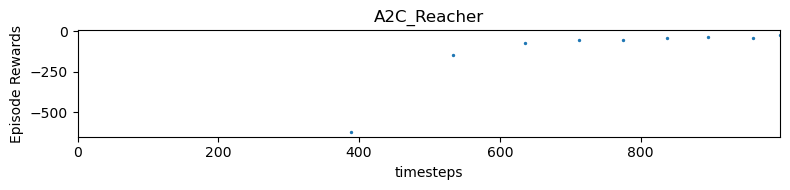

In [11]:
results_plotter.plot_results([log_dir], 1000, results_plotter.X_TIMESTEPS, "A2C_Reacher")

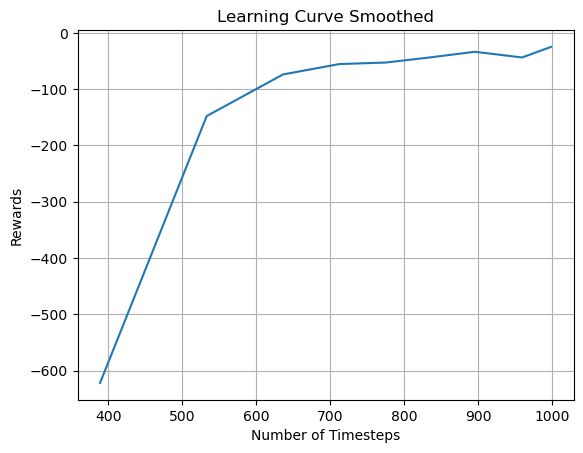

In [26]:
def moving_average(values, window):
    """
    Suaviza los valores haciendo una media
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valido")

def plot_results(log_folder, title="Learning Curve"):
    """
    Graficar los resultados
    """
    x, y = ts2xy(load_results(log_folder), "Timesteps")
    y = moving_average(y, window=1)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.grid()
    plt.title(title + " Smoothed")
    plt.show()
    
plot_results(log_dir)

In [7]:
del model # cuando se entrena agregar, cc solo cargar modelo
model = A2C.load("modeloA2CR1000", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Evaluar politica despues del entrenamiento
eval_env = gymnasium.make("CoppeliaSim_Gym/GymCoppManR-v0")
obs, inf = env.reset()
# Ejecutar el agente entrenado en 'eval_env' durante 25 pasos de tiempo y obtener la recompensa media
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes = 25, deterministic=False)
print(f"Recompensa media = {mean_reward:.2f} +/- {std_reward}")

Conectado al servidor API remoto
Contador:  1
Distancia previa : 0.602 m
Distancia actual: 0.584 m
Recompensa Distancia: -0.584
Recompensa Costo: -0.5178714752197265
Recompensa diferencia: 0.018
Recompensa llegada: 0.0
Recompensa Total:  -1.0843044305378329
--------------------------------------------------------------------
Contador:  2
Distancia previa : 0.584 m
Distancia actual: 0.569 m
Recompensa Distancia: -0.569
Recompensa Costo: -0.3283702373504639
Recompensa diferencia: 0.015
Recompensa llegada: 0.0
Recompensa Total:  -0.8818697503162015
--------------------------------------------------------------------
Contador:  3
Distancia previa : 0.569 m
Distancia actual: 0.561 m
Recompensa Distancia: -0.561
Recompensa Costo: -0.31793975830078125
Recompensa diferencia: 0.008
Recompensa llegada: 0.0
Recompensa Total:  -0.8703610245696516
--------------------------------------------------------------------
Contador:  4
Distancia previa : 0.561 m
Distancia actual: 0.550 m
Recompensa Distanc

Distancia actual: 0.330 m
Recompensa Distancia: -0.330
Recompensa Costo: -0.5484280109405518
Recompensa diferencia: 0.008
Recompensa llegada: 0.330490861445123
Recompensa Total:  -0.5399873516556404
--------------------------------------------------------------------
Contador:  30
Distancia previa : 0.330 m
Distancia actual: 0.326 m
Recompensa Distancia: -0.326
Recompensa Costo: -0.4366306304931641
Recompensa diferencia: 0.004
Recompensa llegada: 0.3261210473242744
Recompensa Total:  -0.4322608163723154
--------------------------------------------------------------------
Contador:  31
Distancia previa : 0.326 m
Distancia actual: 0.324 m
Recompensa Distancia: -0.324
Recompensa Costo: -0.358078408241272
Recompensa diferencia: 0.002
Recompensa llegada: 0.3236648855398933
Recompensa Total:  -0.35562224645689106
--------------------------------------------------------------------
Contador:  32
Distancia previa : 0.324 m
Distancia actual: 0.328 m
Recompensa Distancia: -0.328
Recompensa Costo

Distancia actual: 0.374 m
Recompensa Distancia: -0.374
Recompensa Costo: -0.39600515365600586
Recompensa diferencia: 0.003
Recompensa llegada: 0.0
Recompensa Total:  -0.7675679315035027
--------------------------------------------------------------------
Contador:  58
Distancia previa : 0.374 m
Distancia actual: 0.370 m
Recompensa Distancia: -0.370
Recompensa Costo: -0.12368946075439453
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -0.48911379232284874
--------------------------------------------------------------------
Contador:  59
Distancia previa : 0.370 m
Distancia actual: 0.363 m
Recompensa Distancia: -0.363
Recompensa Costo: -0.3502802133560181
Recompensa diferencia: 0.007
Recompensa llegada: 0.0
Recompensa Total:  -0.7060308679366842
--------------------------------------------------------------------
Contador:  60
Distancia previa : 0.363 m
Distancia actual: 0.363 m
Recompensa Distancia: -0.363
Recompensa Costo: -0.3978510618209839
Recompensa diferenc

Distancia actual: 0.241 m
Recompensa Distancia: -0.241
Recompensa Costo: -0.35754027366638186
Recompensa diferencia: 0.003
Recompensa llegada: 0.24147287353336366
Recompensa Total:  -0.35450709026165594
--------------------------------------------------------------------
Contador:  85
Distancia previa : 0.241 m
Distancia actual: 0.239 m
Recompensa Distancia: -0.239
Recompensa Costo: -0.3076138257980347
Recompensa diferencia: 0.002
Recompensa llegada: 0.2394972471321447
Recompensa Total:  -0.3056381993968157
--------------------------------------------------------------------
Contador:  86
Distancia previa : 0.239 m
Distancia actual: 0.247 m
Recompensa Distancia: -0.247
Recompensa Costo: -0.4165205001831055
Recompensa diferencia: -0.007
Recompensa llegada: 0.24656204020473474
Recompensa Total:  -0.4235852932556955
--------------------------------------------------------------------
Contador:  87
Distancia previa : 0.602 m
Distancia actual: 0.584 m
Recompensa Distancia: -0.584
Recompensa

Distancia actual: 0.317 m
Recompensa Distancia: -0.317
Recompensa Costo: -0.3024596691131592
Recompensa diferencia: 0.010
Recompensa llegada: 0.31668449037330104
Recompensa Total:  -0.2928092187211634
--------------------------------------------------------------------
Contador:  113
Distancia previa : 0.317 m
Distancia actual: 0.308 m
Recompensa Distancia: -0.308
Recompensa Costo: -0.6352088928222657
Recompensa diferencia: 0.008
Recompensa llegada: 0.30849459821491826
Recompensa Total:  -0.6270190006638829
--------------------------------------------------------------------
Contador:  114
Distancia previa : 0.308 m
Distancia actual: 0.301 m
Recompensa Distancia: -0.301
Recompensa Costo: -0.5608757019042969
Recompensa diferencia: 0.008
Recompensa llegada: 0.30077121594864437
Recompensa Total:  -0.553152319638023
--------------------------------------------------------------------
Contador:  115
Distancia previa : 0.301 m
Distancia actual: 0.293 m
Recompensa Distancia: -0.293
Recompensa

Distancia actual: 0.478 m
Recompensa Distancia: -0.478
Recompensa Costo: -0.3822965621948242
Recompensa diferencia: 0.014
Recompensa llegada: 0.0
Recompensa Total:  -0.8469137539327185
--------------------------------------------------------------------
Contador:  140
Distancia previa : 0.478 m
Distancia actual: 0.462 m
Recompensa Distancia: -0.462
Recompensa Costo: -0.6330260753631592
Recompensa diferencia: 0.016
Recompensa llegada: 0.0
Recompensa Total:  -1.0796400495703176
--------------------------------------------------------------------
Contador:  141
Distancia previa : 0.462 m
Distancia actual: 0.451 m
Recompensa Distancia: -0.451
Recompensa Costo: -0.5263120651245118
Recompensa diferencia: 0.012
Recompensa llegada: 0.0
Recompensa Total:  -0.965671357275036
--------------------------------------------------------------------
Contador:  142
Distancia previa : 0.451 m
Distancia actual: 0.437 m
Recompensa Distancia: -0.437
Recompensa Costo: -0.37938120365142824
Recompensa diferenc

Distancia actual: 0.282 m
Recompensa Distancia: -0.282
Recompensa Costo: -0.2878866672515869
Recompensa diferencia: 0.001
Recompensa llegada: 0.28224803837984763
Recompensa Total:  -0.2873455928416388
--------------------------------------------------------------------
Contador:  168
Distancia previa : 0.282 m
Distancia actual: 0.279 m
Recompensa Distancia: -0.279
Recompensa Costo: -0.3330347299575806
Recompensa diferencia: 0.004
Recompensa llegada: 0.2786864543839102
Recompensa Total:  -0.3294731459616432
--------------------------------------------------------------------
Contador:  169
Distancia previa : 0.279 m
Distancia actual: 0.270 m
Recompensa Distancia: -0.270
Recompensa Costo: -0.29021074771881106
Recompensa diferencia: 0.009
Recompensa llegada: 0.269967316949626
Recompensa Total:  -0.2814916102845269
--------------------------------------------------------------------
Contador:  170
Distancia previa : 0.270 m
Distancia actual: 0.257 m
Recompensa Distancia: -0.257
Recompensa 

Distancia actual: 0.403 m
Recompensa Distancia: -0.403
Recompensa Costo: -0.4718794345855713
Recompensa diferencia: 0.006
Recompensa llegada: 0.0
Recompensa Total:  -0.8682578402360379
--------------------------------------------------------------------
Contador:  196
Distancia previa : 0.403 m
Distancia actual: 0.396 m
Recompensa Distancia: -0.396
Recompensa Costo: -0.5013315200805665
Recompensa diferencia: 0.006
Recompensa llegada: 0.0
Recompensa Total:  -0.8909880142997342
--------------------------------------------------------------------
Contador:  197
Distancia previa : 0.396 m
Distancia actual: 0.391 m
Recompensa Distancia: -0.391
Recompensa Costo: -0.21004989147186282
Recompensa diferencia: 0.005
Recompensa llegada: 0.0
Recompensa Total:  -0.5954186373043048
--------------------------------------------------------------------
Contador:  198
Distancia previa : 0.391 m
Distancia actual: 0.370 m
Recompensa Distancia: -0.370
Recompensa Costo: -0.5036708354949951
Recompensa diferen

Distancia actual: 0.225 m
Recompensa Distancia: -0.225
Recompensa Costo: -0.3386465072631836
Recompensa diferencia: 0.002
Recompensa llegada: 0.22546447832993555
Recompensa Total:  -0.3364679015024765
--------------------------------------------------------------------
Contador:  223
Distancia previa : 0.225 m
Distancia actual: 0.218 m
Recompensa Distancia: -0.218
Recompensa Costo: -0.6719483375549317
Recompensa diferencia: 0.008
Recompensa llegada: 0.2176757068544768
Recompensa Total:  -0.6641595660794729
--------------------------------------------------------------------
Contador:  224
Distancia previa : 0.218 m
Distancia actual: 0.224 m
Recompensa Distancia: -0.224
Recompensa Costo: -0.5726903915405274
Recompensa diferencia: -0.006
Recompensa llegada: 0.22351022107246477
Recompensa Total:  -0.5785249057585153
--------------------------------------------------------------------
Contador:  225
Distancia previa : 0.602 m
Distancia actual: 0.591 m
Recompensa Distancia: -0.591
Recompens

Distancia actual: 0.358 m
Recompensa Distancia: -0.358
Recompensa Costo: -0.2308199405670166
Recompensa diferencia: 0.004
Recompensa llegada: 0.0
Recompensa Total:  -0.5849724251043928
--------------------------------------------------------------------
Contador:  251
Distancia previa : 0.358 m
Distancia actual: 0.350 m
Recompensa Distancia: -0.350
Recompensa Costo: -0.36603770256042484
Recompensa diferencia: 0.008
Recompensa llegada: 0.0
Recompensa Total:  -0.708582959930236
--------------------------------------------------------------------
Contador:  252
Distancia previa : 0.350 m
Distancia actual: 0.346 m
Recompensa Distancia: -0.346
Recompensa Costo: -0.3561474084854126
Recompensa diferencia: 0.005
Recompensa llegada: 0.34558418306653643
Recompensa Total:  -0.3512668055156039
--------------------------------------------------------------------
Contador:  253
Distancia previa : 0.346 m
Distancia actual: 0.337 m
Recompensa Distancia: -0.337
Recompensa Costo: -0.38012812137603763
Re